In [9]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical

from keras.datasets import imdb

print(os.getcwd())
print('Modules imported \n')
# print('Files in current directory:')
# from subprocess import check_output
# print(check_output(['ls', '../Keras']).decode('utf8'))

C:\Users\zcxu\Desktop\github\Learn Process\Keras
Modules imported 



In [10]:
# load IMDB data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 2s 0us/step


In [11]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*50)
print('test_data ', test_data.shape)
print('test_label ', test_labels.shape)
print('_'*50)
print('Maximum value of a word index ')
print(max([max(sequence) for sequence in train_data]))
print('Maximum length num words of review in train ')
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
__________________________________________________
test_data  (25000,)
test_label  (25000,)
__________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [13]:
# see an actual review in words
# reverse from integers to words using the DICTIONARY 
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


VECTORIZE as one cannot feed integers into a NN<br>
Encoding the integer sequences into a binary matrix - one hot encoder basically<br>
From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix of 10k columns

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (25000, 10000)
x_test (25000, 10000)


VECTORIZE the labels

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [17]:
# set a VALIDATION set
x_val = x_train[:10000]
partial_x_train = x_train[10000: ]
y_val = y_train[: 10000]
partial_y_train = y_train[10000: ]

print('x_val', x_val.shape)
print('partial_x_train ', partial_x_train.shape)
print('y_val ', y_val.shape)
print('partial_y_train ', partial_y_train.shape)

x_val (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [18]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 223us/step - loss: 1.1558 - acc: 0.6286 - val_loss: 0.8060 - val_acc: 0.8060
Epoch 2/10
15000/15000 [==============================] - 2s 142us/step - loss: 0.7839 - acc: 0.7048 - val_loss: 0.7473 - val_acc: 0.7487
Epoch 3/10
15000/15000 [==============================] - 2s 142us/step - loss: 0.7508 - acc: 0.7432 - val_loss: 0.6959 - val_acc: 0.8473
Epoch 4/10
15000/15000 [==============================] - 2s 140us/step - loss: 0.7231 - acc: 0.7734 - val_loss: 0.6957 - val_acc: 0.7944
Epoch 5/10
15000/15000 [==============================] - 2s 137us/step - loss: 0.7021 - acc: 0.7930 - val_loss: 0.6501 - val_acc: 0.8445
Epoch 6/10
15000/15000 [==============================] - 2s 134us/step - loss: 0.6854 - acc: 0.8041 - val_loss: 0.6239 - val_acc: 0.8510
Epoch 7/10
15000/15000 [==============================] - 2s 135us/step - 

dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

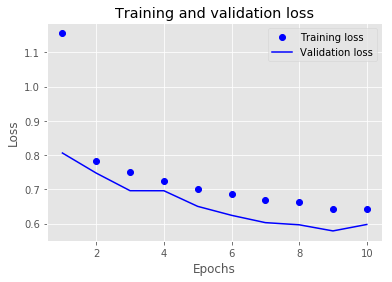

In [20]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

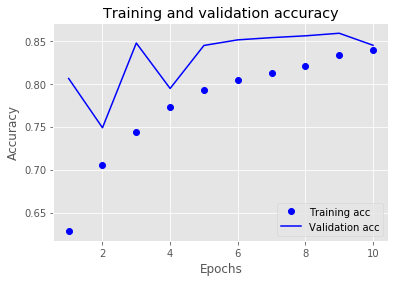

In [21]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()